# Project: Predicting fuel effeciency
Objective: to predict fuel effeciency based on various engine features
data from https://www.kaggle.com/code/rinichristy/best-predictors-for-fuel-consumption-of-vehicles/input

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model



In [4]:
df = pd.read_csv("./data.csv")
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [5]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [27]:
df.isnull().values.any()

np.False_

In [11]:



le = LabelEncoder()
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])



In [10]:
df

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,0,2.4,4,7,3,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,7,3.5,6,8,3,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,7,2.0,4,8,3,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,7,2.0,4,8,3,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,0,2.0,4,8,3,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,7,2.0,4,12,3,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,7,2.0,4,12,3,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,7,2.0,4,12,3,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,8,2.0,4,12,3,11.5,8.4,10.1,28,236,5,5


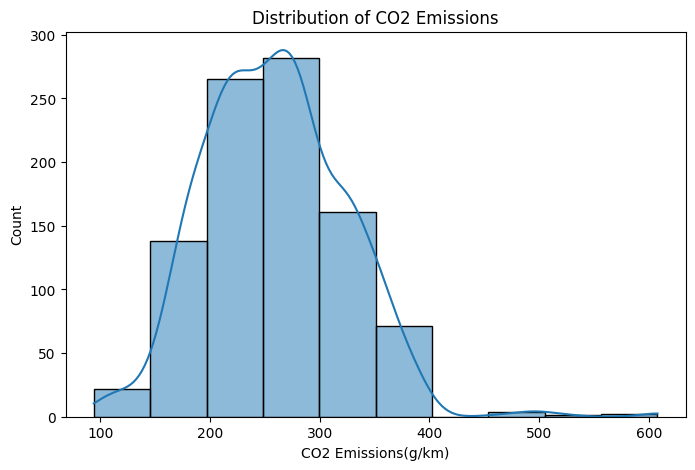

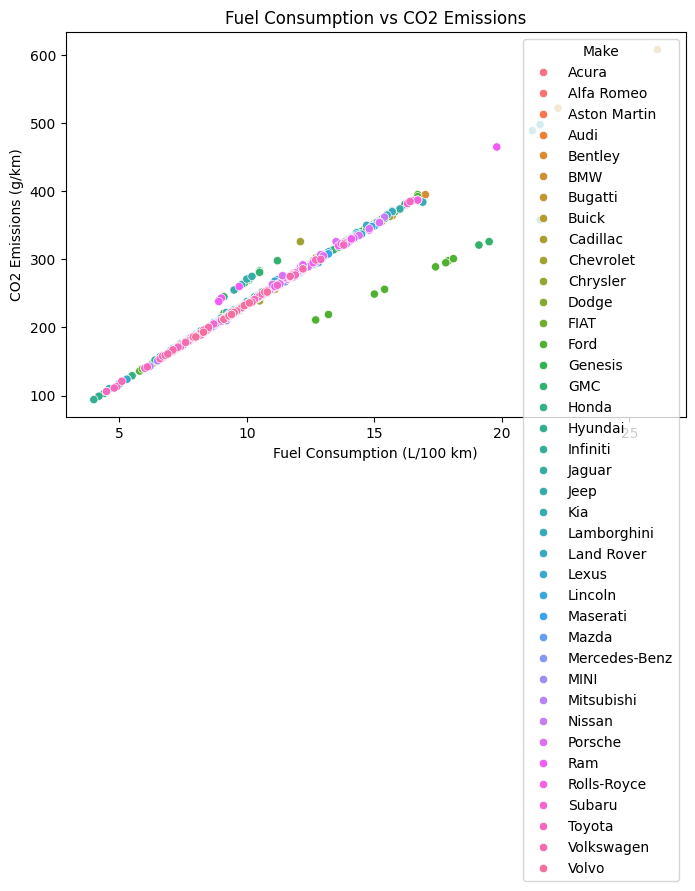

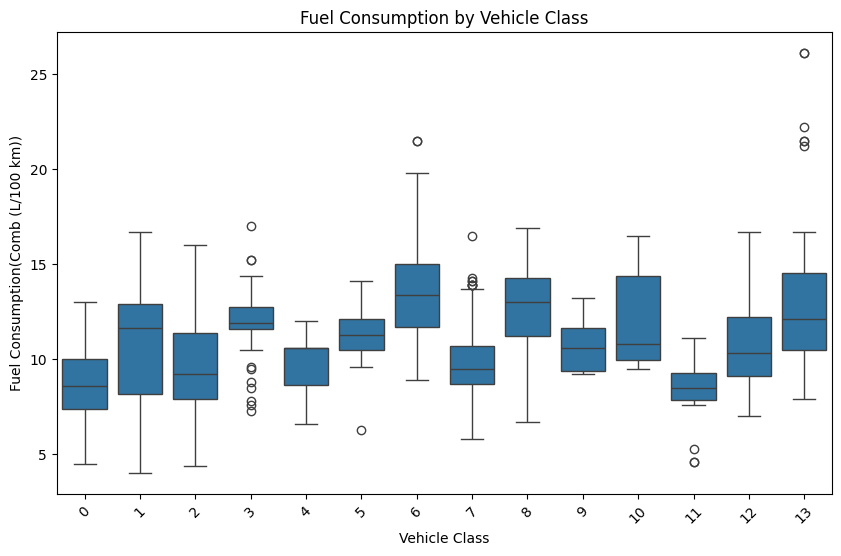

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df["CO2 Emissions(g/km)"], bins=10, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions(g/km)")
plt.show()

# Fuel Consumption vs CO2 Emissions
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Fuel Consumption(Comb (L/100 km))"], y=df["CO2 Emissions(g/km)"], hue=df["Make"])
plt.title("Fuel Consumption vs CO2 Emissions")
plt.xlabel("Fuel Consumption (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# Boxplot for Fuel Consumption by Vehicle Class
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Vehicle Class"], y=df["Fuel Consumption(Comb (L/100 km))"])
plt.xticks(rotation=45)
plt.title("Fuel Consumption by Vehicle Class")
plt.show()

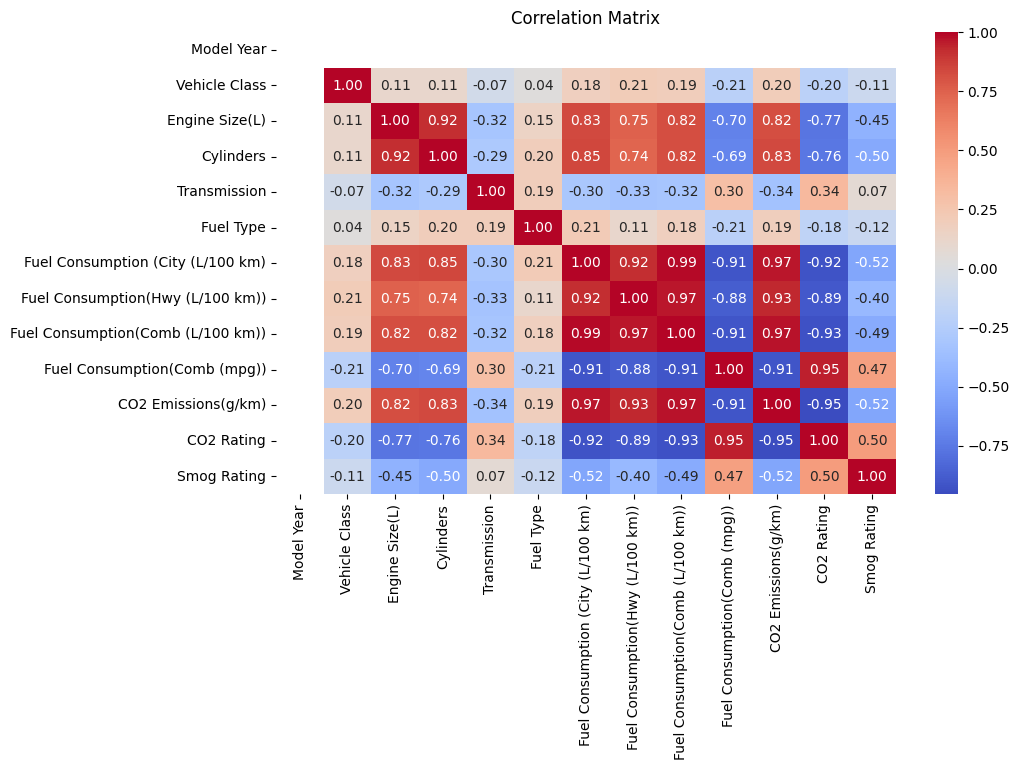

In [24]:
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:


X = df[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]
y = df[['Fuel Consumption(Comb (L/100 km))']]
X.head(2)



,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,2.4,4,7,3,200,6,3
1,7,3.5,6,8,3,263,4,5


In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [31]:


mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)

LinearRegression()

#Model Evaluation

In [37]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))

accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 0.21411980305447506
Mean Squared Error(MSE) of Multiple Linear regression: 0.35268040897477826
Root Mean Squared Error (RMSE) of Multiple Linear regression: 0.5938690166819434
Variance score of Multiple Linear regression: 0.94
Explained Variance Score (EVS) of Multiple Linear regression: 0.9638669247653121
Residual sum of squares of Multiple Linear regression: 0.35
R2 of Multiple Linear regression: 0.9636159473257309
Accuracy of Multiple Linear regression: 0.9636159473257309
